In [2]:
import pandas as pd
from collections import Counter
import dateutil
from matplotlib import pyplot as plt
from googlesearch import search 
from bs4 import BeautifulSoup
import requests


In [4]:
df=pd.read_csv('netflix_titles.csv')



In [5]:
df['date_added'] = pd.to_datetime(df['date_added'])

Finding the actor featured most on netflix

In [7]:
df['cast'].fillna(value='no cast',inplace=True)
all_actors=(df['cast'].apply(lambda x: x.split(',')))
actor_list=[]
for actor in all_actors:
  actor_list+=actor
count_actors=(Counter(actor_list))
count_actors.pop('no cast')
for actor in count_actors:
  if count_actors[actor]==max(count_actors.values()) :
    print('most featured actor on netflix is ',actor, ' appearing ',max(count_actors.values()), ' times')
    break


most featured actor on netflix is   Anupam Kher  appearing  38  times


the first titles added to netflix

In [5]:
filt=df['date_added']==df['date_added'].min()
df.loc[filt]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7113,s7114,Movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,2008-01-01,2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea..."


Looking at the amount of movies added over time by month

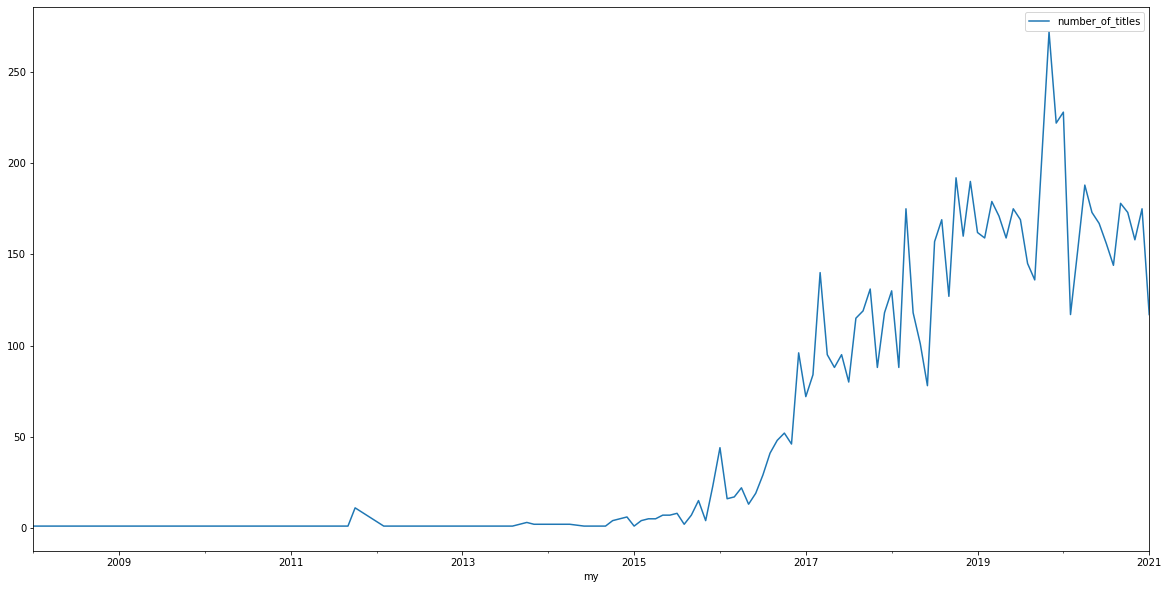

In [28]:
df['my'] = df['date_added'].dt.to_period('m')
small_df=df[['my','title']]
df_grouped=(
    small_df
    .groupby('my')
    .agg({'title':lambda x: list(x)
          })
    .reset_index())
df_grouped=df_grouped.drop(1) #these are titles with no upload dates
df_grouped['number_of_titles']=df_grouped['title'].apply(lambda x: len(x))
df_grouped=df_grouped.drop(columns='title')
df_grouped.set_index('my',inplace=True)
df_grouped.plot(figsize=(20,10))

Imposed against Netflix subscriptions

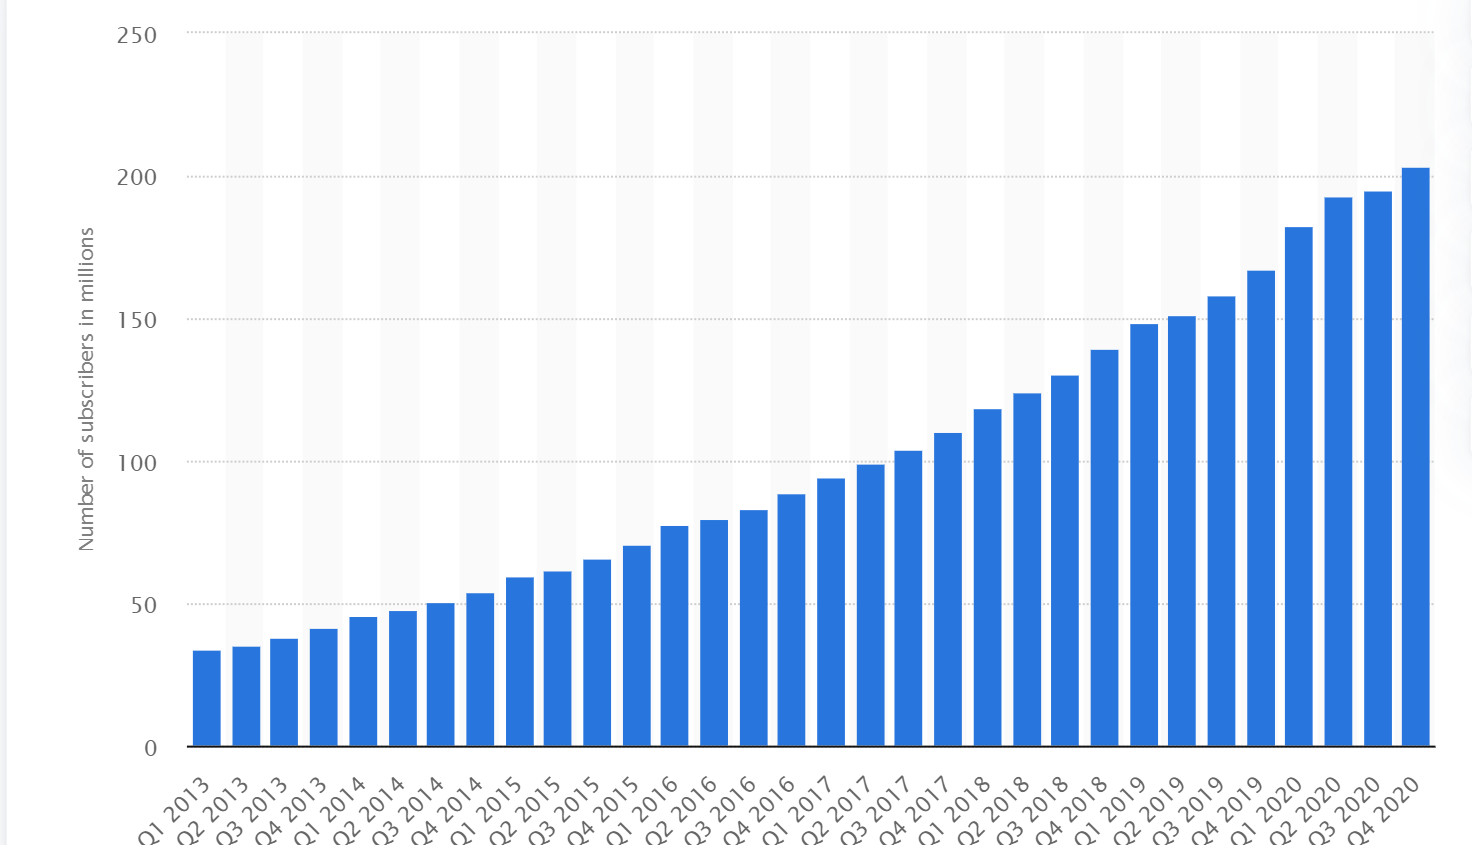

finding the director who did the most netflix films

In [ ]:
directors=df['director'].fillna(value='no director').value_counts()
if directors.index[0]=='no director':
  print (directors.index[1],'with ',directors[1], ' releases')
else:
  print (directors.index[0],'with ',directors[0], ' releases')


Raúl Campos, Jan Suter with  18  releases


Adding the rating of each title from imdb using BeautifulSoup

In [22]:
def ratinger (title):
  query=title+'imdb'
  for j in search(query, tld="com", num=1, stop=1, pause=0.1):
    try:
      source=requests.get(j).text
      soup=BeautifulSoup(source)
      container= soup.find_all('span',itemprop='ratingValue')
      rating=container[0].text
      return rating
    except:
      s='no available rating'
      return s
#To execute for the entire Dataframe see the lines below, though it will take aprox. 5 hours
#df['imdb_rating']=df['title'].apply(ratinger)
#df

Testing the function on a smaller dataset

In [27]:
mini=df[0:20]
mini['imdb_rating']=mini['title'].apply(ratinger)
mini

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,my,imdb_rating
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08,7.4
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12,5.9
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018-12,4.6
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017-11,7.1
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020-01,6.8
5,s6,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2017-07-01,2016,TV-MA,1 Season,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,2017-07,8.4
6,s7,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2020-06-01,2019,TV-MA,95 min,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",2020-06,6.8
7,s8,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,2019-11-01,1997,R,119 min,Dramas,After one of his high school students attacks ...,2019-11,6.7
8,s9,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019-04-01,2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",2019-04,5.3
9,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2017-12-15,2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,2017-12,6.4
